### DM-06 Practice 1  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [2]:
csv_in = 'diemthi2019_update.csv' # university exam score (whole country) of Vietnam

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
df = df.replace(np.nan, 0)
df = df.drop(['Ma Ngoai Ngu'], axis=1)
print(df.shape)
print(df.info())
display(df.head())

(811851, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811851 entries, 0 to 811850
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  811851 non-null  int64  
 1   SBD         811851 non-null  int64  
 2   Ngu Van     811851 non-null  float64
 3   Toan Hoc    811851 non-null  float64
 4   Ngoai Ngu   811851 non-null  float64
 5   Vat Ly      811851 non-null  float64
 6   Hoa Hoc     811851 non-null  float64
 7   Sinh Hoc    811851 non-null  float64
 8   Lich Su     811851 non-null  float64
 9   Dia Ly      811851 non-null  float64
 10  GDCD        811851 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 68.1 MB
None


,Unnamed: 0,SBD,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
0,0,24008611,8.00,8.2,7.6,0.00,0.0,0.0,8.25,7.75,8.75
1,1,51000032,6.17,8.6,8.0,8.25,4.5,6.0,0.00,0.00,0.00
2,2,51000005,4.75,5.2,0.0,0.00,0.0,0.0,4.00,4.25,5.75
3,3,51000021,4.50,4.4,0.0,0.00,0.0,0.0,2.25,4.75,5.00
4,4,51000013,6.00,5.8,4.4,0.00,0.0,0.0,7.75,8.25,7.50


#### Set data   

In [4]:
dfX = df.loc[:, 'Ngu Van': 'GDCD'] #from Literature to Civil Education
print(dfX.shape)
display(dfX.head())

(811851, 9)


,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
0,8.00,8.2,7.6,0.00,0.0,0.0,8.25,7.75,8.75
1,6.17,8.6,8.0,8.25,4.5,6.0,0.00,0.00,0.00
2,4.75,5.2,0.0,0.00,0.0,0.0,4.00,4.25,5.75
3,4.50,4.4,0.0,0.00,0.0,0.0,2.25,4.75,5.00
4,6.00,5.8,4.4,0.00,0.0,0.0,7.75,8.25,7.50


#### Standardization  

In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

#### PCA  

In [6]:
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

#### Check contribution ratio  

In [7]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.60635142 0.21881622 0.05694069 0.04228174 0.02809281 0.01981621
 0.01225198]
[0.60635142 0.82516764 0.88210833 0.92439007 0.95248288 0.97229909
 0.98455107]


**Ans.1: up to PC3 (0.689)**

#### Draw graph of contribution  

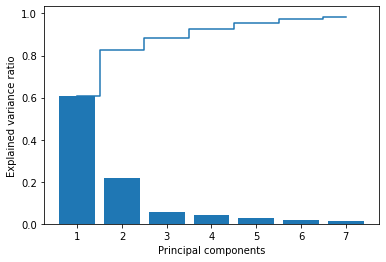

In [8]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

#### Draw biplot  

In [9]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 4.5
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)

**Ans: X-axis: running like 1500m, Y-axis: +:jump, -: throw**  